In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [6]:
df = pd.read_csv("../../../data/train/train.csv")

In [7]:
print(df)

   ID  Age  CreditScore Education RiskLevel
0   1   35          720        16       Low
1   2   28          650        14      High
2   3   45          750   missing       Low
3   4   31          600        12      High
4   5   52          780        18       Low
5   6   29          630        14      High
6   7   42          710        16       Low
7   8   33          640        12      High


In [8]:
# Convert "missing" to NaN and ensure the column is numeric
df["Education"] = df["Education"].replace("missing", np.nan)
df["Education"] = pd.to_numeric(df["Education"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           8 non-null      int64  
 1   Age          8 non-null      int64  
 2   CreditScore  8 non-null      int64  
 3   Education    7 non-null      float64
 4   RiskLevel    8 non-null      object 
dtypes: float64(1), int64(3), object(1)
memory usage: 452.0+ bytes


In [10]:
# Handle missing values by imputing the mean of Education
df = df.copy()
df["Education"] = df["Education"].fillna(df["Education"].mean())

# Convert to numpy arrays
X = np.c_[np.ones(len(df)), df["Age"], df["Education"]]
y = df["CreditScore"].values.reshape(-1, 1)

# Apply Normal Equation: θ = (X^T X)^(-1) X^T y
theta = np.linalg.inv(X.T @ X) @ X.T @ y

theta_0, theta_1, theta_2 = theta.flatten()
print(f"Theta_0 (Intercept): {theta_0:.4f}")
print(f"Theta_1 (Age):       {theta_1:.4f}")
print(f"Theta_2 (Education): {theta_2:.4f}")

Theta_0 (Intercept): 327.3234
Theta_1 (Age):       4.2493
Theta_2 (Education): 13.7929


In [11]:
y_pred = X @ theta

# Compute evaluation metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"\nMean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error (MSE): 370.7662
R² Score: 0.8963


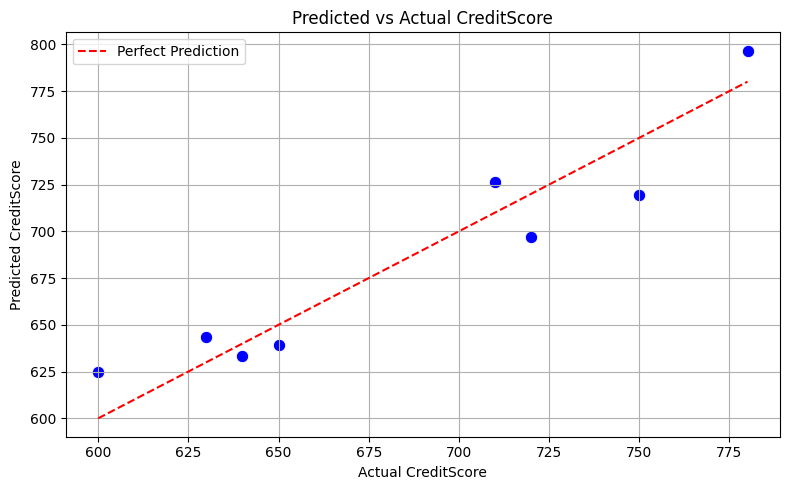

In [13]:
# Predicted vs Actual CreditScore
df["Predicted"] = y_pred
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["CreditScore"], y=df["Predicted"], color="blue", s=80)
plt.plot([df["CreditScore"].min(), df["CreditScore"].max()],
         [df["CreditScore"].min(), df["CreditScore"].max()],
         'r--', label="Perfect Prediction")
plt.xlabel("Actual CreditScore")
plt.ylabel("Predicted CreditScore")
plt.title("Predicted vs Actual CreditScore")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

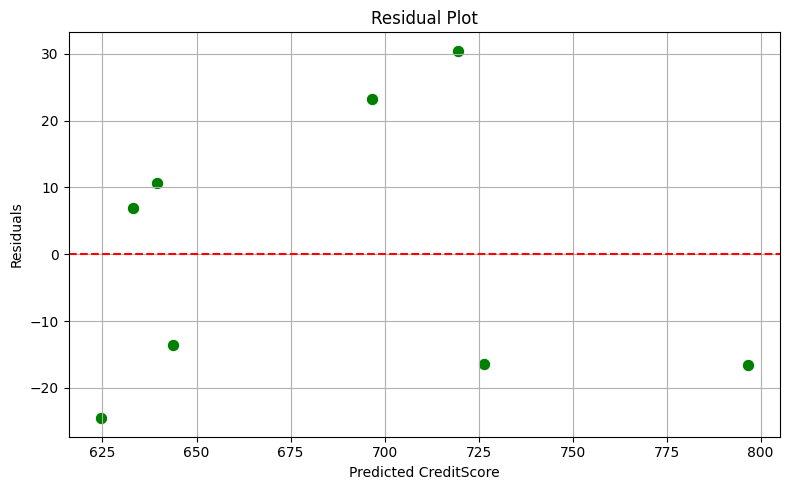

In [14]:
# Residual Plot
df["Residuals"] = df["CreditScore"] - df["Predicted"]
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Predicted"], y=df["Residuals"], color="green", s=80)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted CreditScore")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.tight_layout()
plt.show()

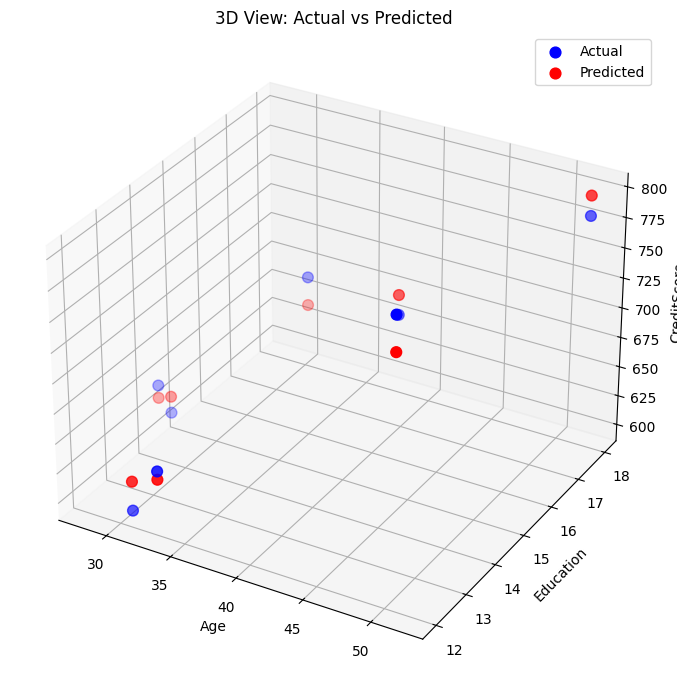

In [15]:
# 3D Visualization of Regression Plane
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df["Age"], df["Education"], df["CreditScore"], c="blue", label="Actual", s=60)
ax.scatter(df["Age"], df["Education"], df["Predicted"], c="red", label="Predicted", s=60)

ax.set_xlabel("Age")
ax.set_ylabel("Education")
ax.set_zlabel("CreditScore")
ax.set_title("3D View: Actual vs Predicted")
ax.legend()
plt.tight_layout()
plt.show()